<br>
    The objective of this exercice is to analyse the control of the autonomic<br>
    nervous system at rest and after alcool consumption using breathing, mean<br>
    blood pressure and interbeat signals.<br>


In [2]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot

Load signals of a subject at rest.

In [3]:
x = np.genfromtxt('heart_1.dat', delimiter='  ').T
x = {'rr':x[0], 'bp':x[1], 'resp':x[2]}
# Load signals of a subject after alcool consumption.
y = np.genfromtxt('heart_2.dat', delimiter='  ').T
y = {'rr':y[0], 'bp':y[1], 'resp':y[2]}
# Signals are sampled at 4 Hz.
fs = 4
# Generate the time for the recordings.
t = np.arange(len(x['rr']))/fs


<br>
    Cardiac interbeats, mean blood pressure and respiration volume of a subject<br>
    at rest.<br>
    

Q: Comment the different signals and their realtionships.<br>



The cardiac interbeat signal is mixed between random and deterministic signals. It is regulated to compensate the changes of pressure in the thoracic due to ventilation, in order to prevent the mean blood pressure to be affected by it. The mean blood pressure is more random than the cardiac interbeat signal. The respiratory volume is a highly deterministic sinusoid like signal.
It can be seen negative drops in the cardiac interbeat intervals that seem to be timelly linked to the spikes that appear in the mean blood pressure temporal graph

Q: Which signals are related and how?

Inhalation causes the drop of the thoracic cage pressure, which will be compensated by a decrease of the cardiac interbeat, therefore an increase in heart rate) in order to keep the mean blood pressure value at a homeastatic state. Exhalation causes the increase of the thoracic cage pressure, which will be compensated by an increase of the cardiac interbeat for the same reason.This phenomena is called the baroreflex regulation of blood pressure and is finelly regulated by the autonomic nervous system. This mechanism enables the mean blood pressure signal to be independent of the respiration volume signal.

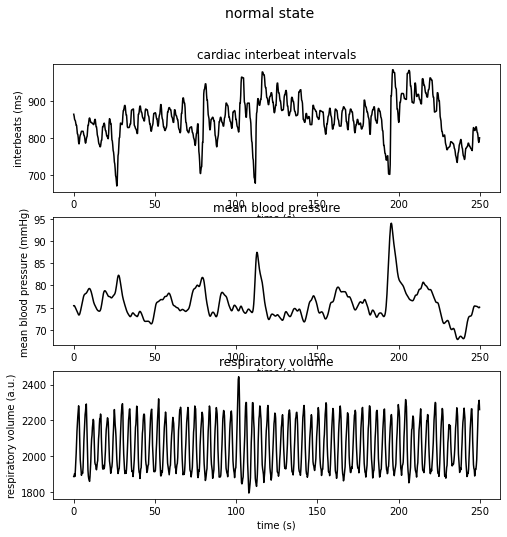

In [4]:
my_plot.plot_time(x, t, 'normal state')


<br>
    Cardiac interbeats, mean blood pressure and respiration volume of a subject<br>
    after alcool consumption.<br>
    


Q: Comment the different signals and their realtionships.<br>

Alcohol consumption delays the previous mechanism, making it less efficient in protecting the mean blood pressure from pressure variations in the thoracic cage. The cardiac interbeat signal becomes more "random" because its regulation is less efficient. Ideed the drops seen previously are completely atenuated.
On another hand, the mean blood pressure becomes more deterministic as it is now more impacted by the respiratory volume and goes to lower values.
The respiratory volume remains highly deterministic, however, there are some big amplitude irregularities.

Q: Which signals are related and how?<br>

Inhalation causes the drop of the thoracic cage pressure, which will be less efficiently compensated by a decrease of the cardiac interbeat due to the dampned signal of the ASN. As consequence of this, the respiratory volume signal will impact the mean blood pressure and cause a drop of it as well.

Q: What are the differences with rest recording of previous figure?

As the mechanism fails to protect the mean blood pressure from ventilation induced pressure changes, some big drops appear following big inhalations.

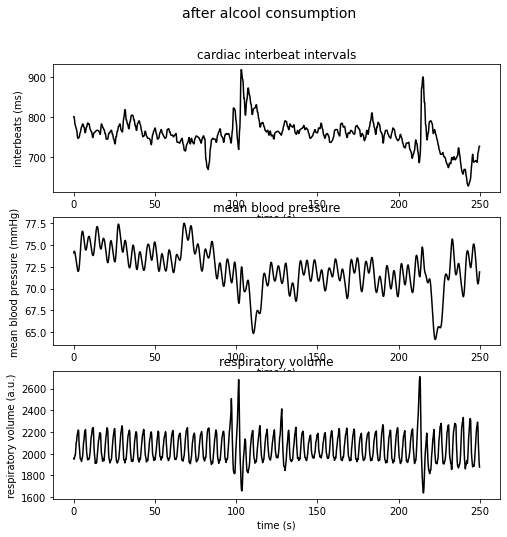

In [5]:
my_plot.plot_time(y, t, 'after alcool consumption')


 <br>
    Compute the intercorrelation of the signals of the subject at rest.<br>
   

Q: Comment the oscillation present in the different signals.<br>

The oscillations in these intercorrelations seem to be predominantly more intense in the respiratory signal. Indeed, in both the cardiac interbeat and mean blood pressure signals, we observe the typical power maxima at 0, with only a few oscillations at the boundaries, far fewer in comparison to the respiratory volume signal. However, the cardiac interbeat signal still exhibits more oscillations than the mean blood pressure signal.

Q: Which signals are related and how.<br>
As said before, cardiac interbeat intervals are made up of a mixture of both deterministic and random signals. The deterministic part comes from the inhale and exhale cycles, while the random part arises from blood pressure.

It can then be assumed that the missing oscillation in the interbeat intervals comes from the "randomness" of the blood pressure, which is constantly adapting to a homeostatic state.



In [6]:
def my_corr(x):
    rxx = np.correlate(x-np.mean(x), x-np.mean(x), mode='full')/len(x)
    return rxx

In [7]:
x['rxx_rr'] = my_corr(x['rr'])
x['rxx_bp'] = my_corr(x['bp'])
x['rxx_resp'] = my_corr(x['resp'])

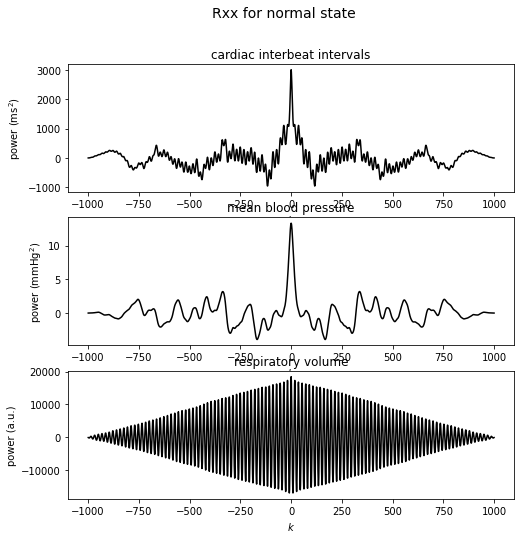

In [8]:
my_plot.plot_rxx(x, 'Rxx for normal state')


 <br>
    Compute the intercorrelation of the signals of the subject after alcool<br>
    consumption.<br>
    

Q: Comment the oscillation present in the different signals.<br>

The first noticeable observation is the respiratory volume oscillations, which have slightly decreased in power amplitude, indicating a reduction in the deterministic properties of breathing volume, likely caused by the influence of alcohol consumption.

Furthermore, it can be observed that the intercorrelation of arterial pressure shows many more oscillations after alcohol consumption, probably due to the delayed response of the autonomic nervous system, leading to an inability to compensate for changes in thoracic pressures caused by the breathing cycle. This lack of regulation results in a slight loss of randomness in the signal.

Finally, when examining the cardiac interbeat intervals, we notice that the signal's intercorrelation has lost its oscillations, indicating a slight loss of its deterministic component.

Q: Which signals are related and how.<br>
From what was discussed earlier, it is safe to conclude that the cardiac interbeat intervals have lost their relationship with the breathing volume signal. This is due to the inability, caused by alcohol, to properly transmit the arterial pressure change signal to the heart, preventing it from adjusting its beating frequency to maintain homeostatic pressure.

However, the mean blood pressure is still related to the cardiac interbeat intervals

Q: What difference do you observe with the previous figure?<br>

As already discussed, alcohol consumption affects the signals involved in maintaining homeostatic values of mean pressure. The alcohol-induced delay in the autonomic nervous system leads to a loss of influence from the breathing cycles on the cardiac interbeat interval signal. This, in turn, results in significant drops in arterial pressure and smaller amplitudes in the mean pressure signal.

In [9]:
y['rxx_rr'] = my_corr(y['rr'])
y['rxx_bp'] = my_corr(y['bp'])
y['rxx_resp'] = my_corr(y['resp'])

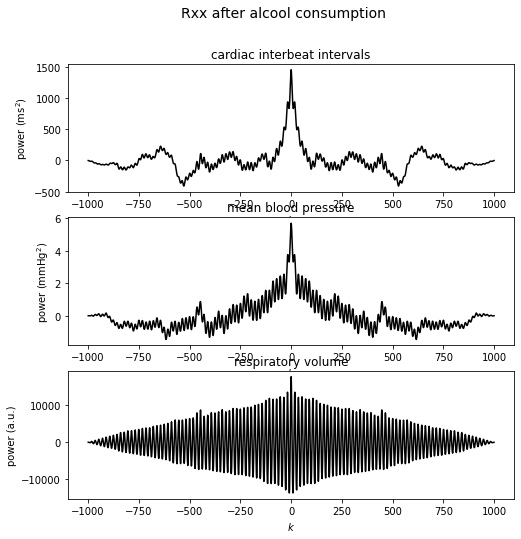

In [10]:
my_plot.plot_rxx(y, 'Rxx after alcool consumption')


 <br>
    Compute the PSD of the signal for the subject at rest.<br>
    

Q: How the different peaks are related to the control of the autonomic nervous system?<br>

The first graph we should focus on is the one describing the PSD of the breathing volume. A single peak can be observed at around 0.23 Hz. This peak also appears in the cardiac interbeat intervals, as it reflects the autonomic system's response to compensate for the lower thoracic pressure during inhalation. The system sends a signal to increase heart rate to maintain homeostatic pressure.

This compensation by the autonomic system explains why there is little to no influence of breathing volume changes on mean arterial pressure, as no distinct peak at ~0.23 Hz is visible in the graph

Moreover, aside from the 0.23 Hz frequency, it is important to note that there are three distinct peaks at lower frequencies, with a major one around ~0.05 Hz in the cardiac interbeat PSD graph. These frequencies could originate from the autonomic system's regulatory signals, which help maintain mean arterial pressure stability by controlling heart rate. This would also explain why these frequencies are also observed in the pressure PSD graph.

the lower frequencies seem to be more related to basic signaling such as hormonal and circadcian signaling and have no direct relatin with the ANS (reason why they dont seem to be significantly affected by alcohol consumption)

Q: Do the positions and amplitude of the peaks confirm you previous   findings?<br>

Yes, for instance the 0.23 Hz frequency once converted to physiological units, we get approximately 13.8 breathing cycles per minute, which falls within the normal physiological range for ventilation frequency.
The lower frequency, as stated previously, represent the autonomous signals that should indeed have a bigger amplitude that the breading one since they strongly control and regulate heart rate ans subsequently blood pressure.


In [11]:
def my_psd(x, half_win=250):
    interval = np.arange(-half_win,half_win+1)+len(x)//2
    x_sub = x[interval]
    psd = np.abs(np.fft.fft(sp.windows.hann(len(interval))*x_sub, 2048))
    return psd

In [12]:
x['RR'] = my_psd(x['rxx_rr'])
x['BP'] = my_psd(x['rxx_bp'])
x['RESP'] = my_psd(x['rxx_resp'])

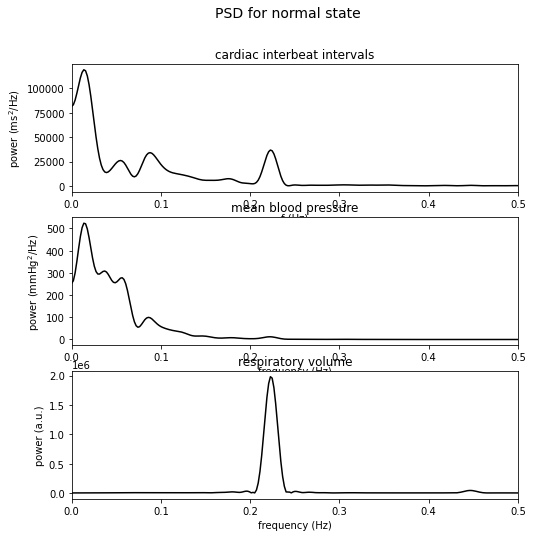

In [13]:
my_plot.plot_X(x, fs, 'PSD for normal state')


 <br>
    Compute the PSD of the signal for the subject after alcool consumption.<br>
    

Q: How the different peaks are related to the control of the autonomic nervous system?<br>

As expected, the 0.23 Hz peak appears in all three graphs, indicating that the breathing cycle now influences both cardiac interbeat intervals and mean blood pressure. The influence on cardiac interbeat intervals is considerably diminished compared to the previous graph (see next questions). This is a consequence of the loss of cardiac regulation by the autonomic nervous system, that fails to send proper signals to the heart to stabilize blood pressure.

Furthermore, the lower frequencies that were previously suspected to originate from autonomic nervous signals in the cardiac interbeat intervals and mean blood pressure have completely, or at least considerably, disappeared, further supporting the lack of proper regulation by the autonomic nervous system.

Q: Do the positions and amplitude of the peaks confirm you previous findings?<br>

Yes, we can clearly see that the influence of respiratory volume on cardiac interbeat interval has significantly decreased as the power amplitude of the 0.23 Hz peak has also dropped. However, as previously stated, since the regulation of pressure by the autonomic nervous system is delayed, the differences in pressure during the breathing cycle begin, as expected, to influence mean blood pressure, as shown by the peak at 0.23 Hz on the mean blood pressure PSD graph.

Finally, as expected and as a consequence of the autonomic system's response delay, the lower frequencies that were previously speculated to be due to the autonomic system signals seem to have somewhat disappeared or, at least, have been strongly attenuated.

In [14]:
y['RR'] = my_psd(y['rxx_rr'])
y['BP'] = my_psd(y['rxx_bp'])
y['RESP'] = my_psd(y['rxx_resp'])

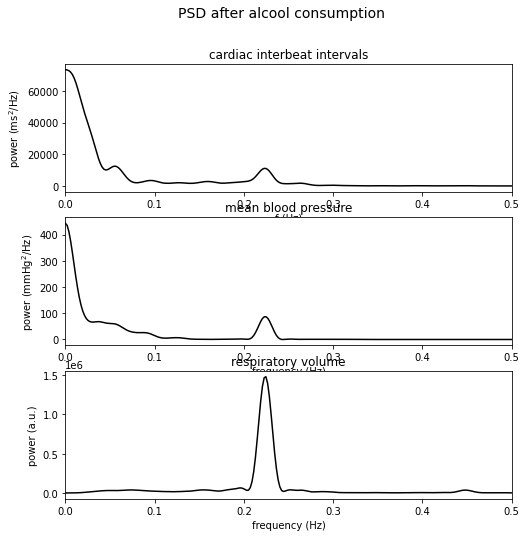

In [15]:
my_plot.plot_X(y, fs, 'PSD after alcool consumption')


<br>
    Plot the PSDs of the signals for the two conditions.<br>
    

Q: Discuss the differences.<br>

The differences between the normal signals and those observed after alcohol consumption have already been discussed in previous questions. However, they can ultimately be summarized as follows: the delay in the autonomic system's signal leads to poor regulation of the cardiac rate and adaptation to the breathing cycle (resulting in a decrease in the power of the 0.23 Hz peak). Consequently, the mean blood pressure, which was previously not influenced by inhalation and exhalation, is now affected by it, as indicated by the appearance of the 0.23 Hz peak.

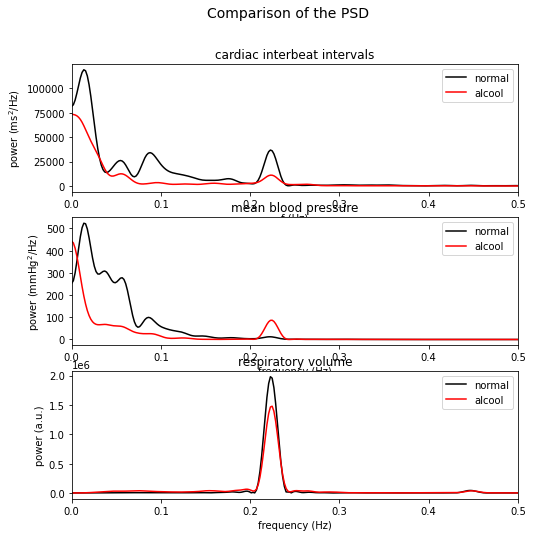

In [16]:
my_plot.plot_XY(x, y, fs, 'Comparison of the PSD')